In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
print(sns.get_dataset_names())
diamonds = sns.load_dataset('diamonds')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds[features]
y = diamonds['price']

In [6]:
clarity_dummies = pd.get_dummies(diamonds['clarity'], prefix='clarity')
print(clarity_dummies.head())
X = pd.concat([X, clarity_dummies], axis=1)

   clarity_IF  clarity_VVS1  clarity_VVS2  clarity_VS1  clarity_VS2  \
0       False         False         False        False        False   
1       False         False         False        False        False   
2       False         False         False         True        False   
3       False         False         False        False         True   
4       False         False         False        False        False   

   clarity_SI1  clarity_SI2  clarity_I1  
0        False         True       False  
1         True        False       False  
2        False        False       False  
3        False        False       False  
4        False         True       False  


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(y_train)
print(y_test)

26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 43152, dtype: int64
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
         ... 
44081    1554
23713     633
31375     761
21772    9836
4998     3742
Name: price, Length: 10788, dtype: int64


In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)
print(f"Predicted Prices: {y_pred}")
print(f"Actual Prices: {y_test}")

Predicted Prices: [ 640.47551109 3122.40762596 1691.3094389  ... 1130.10660968 8087.62839497
 4843.09534662]
Actual Prices: 1388      559
50052    2201
41645    1238
42377    1304
17244    6901
         ... 
44081    1554
23713     633
31375     761
21772    9836
4998     3742
Name: price, Length: 10788, dtype: int64


In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1613865.1555372945
R-squared: 0.8984787518381911


/tmp/ipython-input-3437316018.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='blue')
/tmp/ipython-input-3437316018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


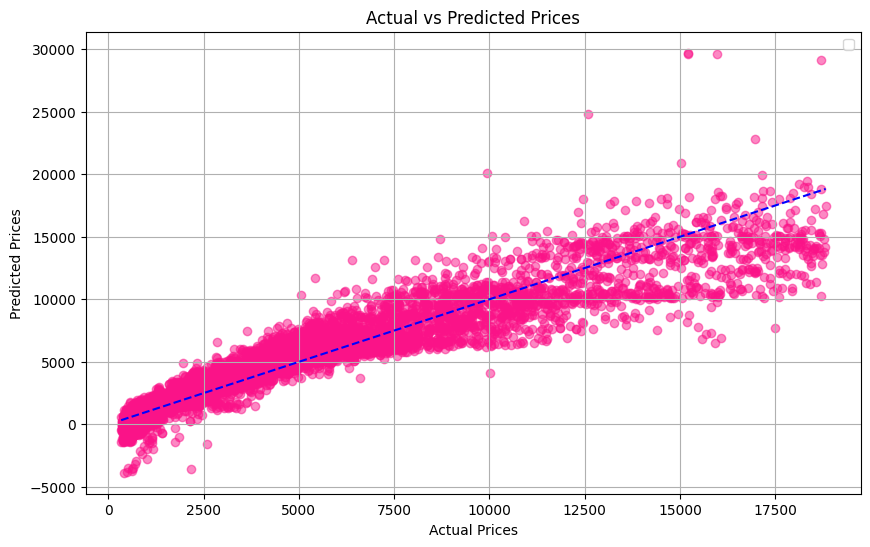

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#FA1388', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()